In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv("Planilha_Planejamento.csv")

In [ ]:
dados

,Mes,Salario_Vendedores,Investimento_Mercadoria,Investimento_Marketing,Faturamento
0,1,2000,10000,4000,22000
1,2,2000,12000,4000,23000
2,3,2000,10000,3000,18000
3,4,2000,8000,2000,17000
4,5,4000,12000,4000,22000
5,6,4000,15000,5000,24000
6,7,4000,10000,5000,27000
7,8,4000,14000,3000,26000
8,9,5000,14000,2000,24000
9,10,5000,16000,3000,29000


In [ ]:
dados["Lucro"] = dados["Faturamento"] - (dados["Salario_Vendedores"] + dados["Investimento_Mercadoria"] + dados["Investimento_Marketing"])

In [ ]:
dados

,Mes,Salario_Vendedores,Investimento_Mercadoria,Investimento_Marketing,Faturamento,Lucro
0,1,2000,10000,4000,22000,6000
1,2,2000,12000,4000,23000,5000
2,3,2000,10000,3000,18000,3000
3,4,2000,8000,2000,17000,5000
4,5,4000,12000,4000,22000,2000
5,6,4000,15000,5000,24000,0
6,7,4000,10000,5000,27000,8000
7,8,4000,14000,3000,26000,5000
8,9,5000,14000,2000,24000,3000
9,10,5000,16000,3000,29000,5000


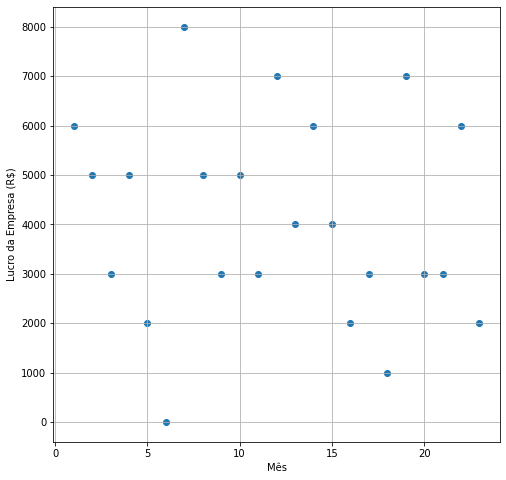

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(dados["Mes"], dados["Lucro"])
plt.xlabel("Mês")
plt.ylabel("Lucro da Empresa (R$)")
plt.grid()
plt.show()

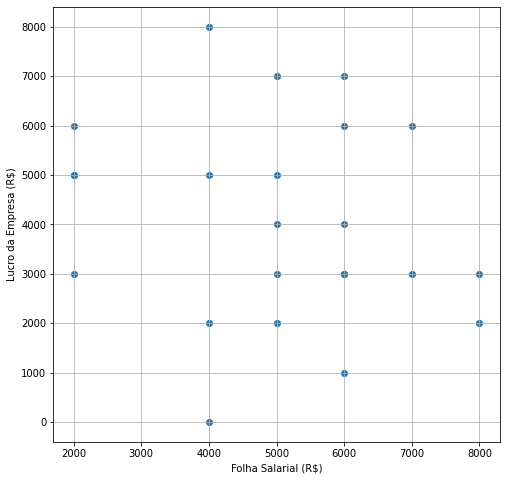

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(dados["Salario_Vendedores"], dados["Lucro"])
plt.xlabel("Folha Salarial (R$)")
plt.ylabel("Lucro da Empresa (R$)")
plt.grid()
plt.show()

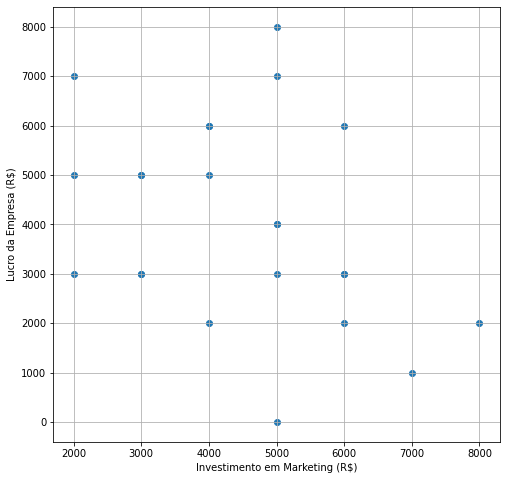

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(dados["Investimento_Marketing"], dados["Lucro"])
plt.xlabel("Investimento em Marketing (R$)")
plt.ylabel("Lucro da Empresa (R$)")
plt.grid()
plt.show()

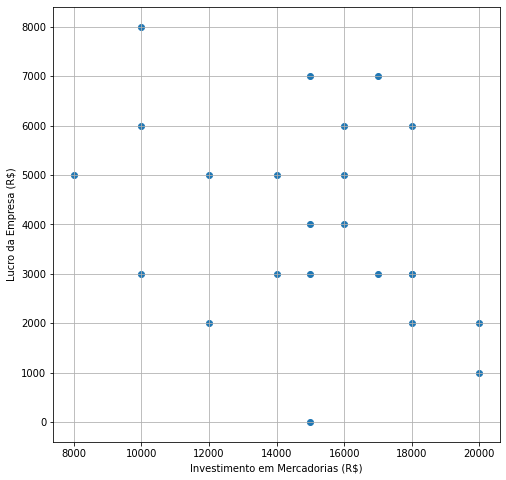

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(dados["Investimento_Mercadoria"], dados["Lucro"])
plt.xlabel("Investimento em Mercadorias (R$)")
plt.ylabel("Lucro da Empresa (R$)")
plt.grid()
plt.show()

<h1><b> Para o mês anterior (mês 23), com lucro de 2000, os investimentos foram (em R$): </b> <br>
Folha Salarial: 8000 <br>
Investimento em Mercadorias: 20000 <br>
Investimento em Marketing: 8000 <br>
<br> <b>Mantendo os mesmos 36000 investidos, que combinação de variáveis tende a dar um lucro maior para o mês corrente (mês 24)?

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
dados.columns

Index(['Mes', 'Salario_Vendedores', 'Investimento_Mercadoria',
       'Investimento_Marketing', 'Faturamento', 'Lucro'],
      dtype='object')

In [ ]:
x_train = dados[['Mes', 'Salario_Vendedores', 'Investimento_Mercadoria', 'Investimento_Marketing']].values
y_train = dados['Lucro'].values

In [ ]:
#Aplicando ajuste (treinando algoritmo)
model = LinearRegression().fit(x_train, y_train)

In [ ]:
melhor_resultado = 0

In [ ]:
#Avaliando tendência
teste = {"Mês" : 24,
         "Salário" : 11000,
         "Mercadorias" : 17000,
         "Marketing" : 8000
         }

resultado = model.predict(np.array([teste["Mês"], teste["Salário"], teste["Mercadorias"], teste["Marketing"]]).reshape(1, -1))[-1]
print("O lucro tenderia a ser de: ", resultado, " R$")

if resultado > melhor_resultado:
  melhor_resultado = resultado
  melhor_combinacao = teste

print("\n Melhor combinação de valores até agora: ")
print(melhor_combinacao)

O lucro tenderia a ser de:  2440.327477065579  R$

 Melhor combinação de valores até agora: 
{'Mês': 24, 'Salário': 8000, 'Mercadorias': 20000, 'Marketing': 8000}


# Regressão Linear nem sempre consegue fazer uma estimativa exata, mas é uma boa ferramenta para avaliar tendências.